In [1]:
# Install core libraries for NLP and deep learning quietly (suppress output)
!pip install transformers datasets scikit-learn torch --quiet

# Install the 'evaluate' library for model evaluation metrics
!pip install evaluate

# Uninstall wandb if it exists to avoid conflicts
!pip uninstall -y wandb

# Install DagsHub and MLflow libraries for experiment tracking
!pip install dagshub mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 38.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

In [2]:
pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 102.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.53.3
    Uninstalling transformers-4.53.3:
      Successfully uninstalled transformers-4.53.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

# Set environment variable for DagsHub username
os.environ["DAGSHUB_USERNAME"] = "doaahazem"

# Set environment variable for DagsHub personal access token
os.environ["DAGSHUB_TOKEN"] = "be104d77a749c6c888c26368ff53fcab3fe26465"


In [4]:
import requests

# Send a GET request to the DagsHub API to access repository information
resp = requests.get(
    "https://dagshub.com/api/v1/repos/doaahazem/classification-model-mlflow",  # API endpoint for the repository
    auth=(os.environ["DAGSHUB_USERNAME"], os.environ["DAGSHUB_TOKEN"])  # Use environment variables for username and token
)

In [5]:
!pip install dagshub mlflow --quiet

import dagshub

# Initialize the DagsHub integration for this repository
dagshub.init(
    repo_owner='doaahazem',                  # GitHub/DagsHub username or organization
    repo_name='classification-model-mlflow', # Repository name
    mlflow=True                              # Enable MLflow integration for experiment tracking
)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=16174024-1990-4018-9ef9-118089df8dc1&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=ad5b3c087e12b5df38bcc3a2872bc8ef55b98f450565e9455a7a695b8f53675a




Accessing as DoaaHazem

Initialized MLflow to track repo "doaahazem/classification-model-mlflow"

Repository doaahazem/classification-model-mlflow initialized!

In [6]:
import json
import torch
import mlflow
import evaluate
import numpy as np
import pandas as pd
import mlflow.transformers
from datasets import Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from transformers import Trainer, TrainingArguments, AutoTokenizer, DataCollatorWithPadding , AutoModelForSequenceClassification

2025-11-30 02:47:42.469316: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764470862.642118      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764470862.692697      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [7]:
# Model name on Hugging Face Hub
model_name = "bert-base-multilingual-cased"

# Download tokenizer + weights
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name,num_labels=5)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
df = pd.read_excel("/kaggle/input/complaint-student-data/Dataset complaint Management System.xlsx")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Unnamed: 1,Category,ComplaintText
0,1.0,NaN,Facilities_Logistics,Access to certain buildings is restricted with...
1,2.0,NaN,Coursers_Training,Access to supplementary videos is blocked.
2,3.0,NaN,Certificates_Documents,Administrative emails are not replied to promp...
3,4.0,NaN,Certificates_Documents,Administrative office does not respond to urge...
4,5.0,NaN,Certificates_Documents,Administrative office hours are not updated on...


In [9]:
TEXT_COL = "ComplaintText"    # <-- change to exact name
LABEL_COL = "Category"        # <-- change to exact name

# Keep only those two
df = df[[TEXT_COL, LABEL_COL]].dropna().reset_index(drop=True)

# Rename to standard names
df = df.rename(columns={TEXT_COL: "text", LABEL_COL: "labels"})

print(df.shape)
print(df.head(38))

(4061, 2)
                                                 text                  labels
0   Access to certain buildings is restricted with...    Facilities_Logistics
1          Access to supplementary videos is blocked.       Coursers_Training
2   Administrative emails are not replied to promp...  Certificates_Documents
3   Administrative office does not respond to urge...  Certificates_Documents
4   Administrative office hours are not updated on...  Certificates_Documents
5   Administrative staff is slow to approve certif...  Certificates_Documents
6   Administrative staff response is inconsistent ...  Certificates_Documents
7        Approval process for internships is delayed.  Certificates_Documents
8     Assignment deadlines are unclear in the portal.       Coursers_Training
9     Assignment extensions are not reflected in LMS.       Coursers_Training
10  Assignment file formats are not compatible wit...       Coursers_Training
11   Assignment reminders are not sent automatically. 

In [10]:
# Label encoding the labels
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['labels'])

# Show the label encoding
print(label_encoder.classes_)

['Certificates_Documents' 'Coursers_Training' 'Facilities_Logistics'
 'Finance_Admin' 'IT_Support ']


In [11]:
# Loop through all classes in the label encoder and print their corresponding index
for idx, class_name in enumerate(label_encoder.classes_):
    # Show mapping from class name to integer label
    print(f"{class_name} → {idx}")


Certificates_Documents → 0
Coursers_Training → 1
Facilities_Logistics → 2
Finance_Admin → 3
IT_Support  → 4


In [12]:
# Check if a GPU is available; otherwise, use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Print which device will be used for training/inference
print(f"Using device: {device}")


Using device: cuda


In [13]:
# --- Split the dataset into train, validation, and test sets ---

# Split 80% of the data for training, 20% for temporary validation+test
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)

# Split the temporary set equally into validation (10%) and test (10%)
val_df, test_df   = train_test_split(temp_df, test_size=0.5, random_state=42)

# --- Convert Pandas DataFrames to Hugging Face Dataset objects ---
train_dataset = Dataset.from_pandas(train_df)
val_dataset   = Dataset.from_pandas(val_df)
test_dataset  = Dataset.from_pandas(test_df)

# --- Tokenizer function ---
def tokenize_function(examples):
    """
    Tokenize the 'text' column using the pretrained tokenizer.
    Truncates/pads sequences to max_length=512.
    """
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=512)

# --- Apply tokenization to each dataset ---
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset   = val_dataset.map(tokenize_function, batched=True)
test_dataset  = test_dataset.map(tokenize_function, batched=True)

# --- Keep only the columns required by the model ---
cols = ["input_ids", "attention_mask", "labels"]  # Standard for most Transformers
if "token_type_ids" in train_dataset.column_names:  # Include if model uses token_type_ids (e.g., BERT)
    cols.append("token_type_ids")

train_dataset = train_dataset.with_format("torch", columns=cols)
val_dataset   = val_dataset.with_format("torch", columns=cols)
test_dataset  = test_dataset.with_format("torch", columns=cols)

# --- Move model to device (GPU if available, else CPU) ---
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# Print the sizes of the datasets to confirm splits
print(len(train_dataset), len(val_dataset), len(test_dataset))


Map:   0%|          | 0/3248 [00:00<?, ? examples/s]

Map:   0%|          | 0/406 [00:00<?, ? examples/s]

Map:   0%|          | 0/407 [00:00<?, ? examples/s]

3248 406 407


In [14]:
# Print the column names of the training dataset
print(train_dataset.column_names)  # Shows which fields/features are available in the dataset

['text', 'labels', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask']


In [15]:
# Loop through each class in the label encoder and print its corresponding index
for idx, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} → {idx}")  # Show mapping from class name to integer label

# Print the count of each label in the train dataset
print('Train_Dataset:', test_df['labels'].value_counts())  # Shows distribution of classes in train set


Certificates_Documents → 0
Coursers_Training → 1
Facilities_Logistics → 2
Finance_Admin → 3
IT_Support  → 4
Train_Dataset: labels
4    102
0     81
1     77
2     75
3     72
Name: count, dtype: int64


In [16]:
# Loop through each class in the label encoder and print its corresponding index
for idx, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} → {idx}")  # Show mapping from class name to integer label

# Print the count of each label in the val dataset
print('val_Dataset:', test_df['labels'].value_counts())  # Shows distribution of classes in val set


Certificates_Documents → 0
Coursers_Training → 1
Facilities_Logistics → 2
Finance_Admin → 3
IT_Support  → 4
val_Dataset: labels
4    102
0     81
1     77
2     75
3     72
Name: count, dtype: int64


In [17]:
# Loop through each class in the label encoder and print its corresponding index
for idx, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} → {idx}")  # Show mapping from class name to integer label

# Print the count of each label in the test dataset
print('Test_Dataset:', test_df['labels'].value_counts())  # Shows distribution of classes in test set


Certificates_Documents → 0
Coursers_Training → 1
Facilities_Logistics → 2
Finance_Admin → 3
IT_Support  → 4
Test_Dataset: labels
4    102
0     81
1     77
2     75
3     72
Name: count, dtype: int64


In [18]:
# Create a data collator to batch data correctly
data_collator = DataCollatorWithPadding(tokenizer)

In [19]:
# Unfreeze all BERT parameters

# Loop through every parameter inside the BERT encoder
for param in model.parameters():
    
    # Set requires_grad=True so these parameters will be updated during training
    param.requires_grad = True


In [20]:
# Count total and trainable parameters in the model

# Count all parameters in the model (trainable + frozen)
total_params = sum(p.numel() for p in model.parameters())

# Count only the parameters that require gradients (trainable parameters)
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the total number of parameters in a readable format with commas
print(f"Total parameters: {total_params:,}")

# Print the number of parameters that will actually be updated during training
print(f"Trainable parameters: {trainable_params:,}")

# Print the number of frozen parameters (not updated during training)
print(f"Frozen parameters: {total_params - trainable_params:,}")


Total parameters: 177,857,285
Trainable parameters: 177,857,285
Frozen parameters: 0


In [21]:
# Load metrics
accuracy_metric = evaluate.load("accuracy")     # Load accuracy metric from the evaluate library
f1_metric = evaluate.load("f1")                 # Load F1 metric from the evaluate library

# Define the compute_metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred             # eval_pred contains model logits and true labels
    preds = predictions.argmax(axis=1)          # Convert logits into predicted class indices
    
    # Compute accuracy
    accuracy = accuracy_metric.compute(
        predictions=preds, 
        references=labels
    )

    # Compute F1-score with weighted average
    f1 = f1_metric.compute(
        predictions=preds, 
        references=labels, 
        average="weighted"
    )
    
    # Return both metrics as a dictionary
    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"]
    }

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",                     # Directory to store model checkpoints and outputs
    num_train_epochs=2,                         # Number of training epochs
    weight_decay=0.01,                          # Weight decay for regularization
    per_device_train_batch_size=16,             # Training batch size for each device (GPU/CPU)
    per_device_eval_batch_size=16,              # Evaluation batch size for each device
    logging_dir="./logs",                       # Directory for storing training logs
    logging_steps=10,                           # Log training progress every 10 steps

    # Extra settings to avoid saving large checkpoints
    save_strategy="no",                         # Disable automatic saving of model checkpoints
    save_total_limit=1,                         # Keep only 1 checkpoint if saving was enabled (safety)
    
    metric_for_best_model="f1",                 # Metric used to select the best model
    greater_is_better=True,                     # Higher F1 means better model performance

    report_to=None                              # Disable reporting to external tracking tools (e.g., wandb)
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                                # Pretrained transformer model (BERT)
    args=training_args,                         # Training configuration defined above
    train_dataset=train_dataset,                # Training dataset
    eval_dataset=val_dataset,                   # Validation dataset
    compute_metrics=compute_metrics,            # Function to compute accuracy and F1 during evaluation
    tokenizer=tokenizer,                        # Tokenizer used for text preprocessing
    data_collator=data_collator                 # Function to batch and pad the data
)

# ===== Train the model =====
trainer.train()                                  # Start the training process


/tmp/ipykernel_20/743346959.py:50: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
2025/11/30 02:48:11 ERROR mlflow.utils.async_logging.async_logging_queue: Run Id e5075226137143cd8af4cbb21988a194: Failed to log run data: Exception: BAD_REQUEST: Response: {'error_code': 'BAD_REQUEST'}


Step,Training Loss
10,1.586800
20,1.503900
30,1.553400
40,1.375600
50,1.323000
60,1.395100
70,1.419400
80,1.224500
90,1.044800
100,0.991500


TrainOutput(global_step=406, training_loss=0.6775701119394725, metrics={'train_runtime': 419.6579, 'train_samples_per_second': 15.479, 'train_steps_per_second': 0.967, 'total_flos': 1709215453446144.0, 'train_loss': 0.6775701119394725, 'epoch': 2.0})

In [22]:
# Save the trained model to a folder named "final_model"
trainer.save_model("./final_model")

# Evaluate the model on the validation dataset
eval_results = trainer.evaluate(val_dataset)    
print(f"Validation results: {eval_results}")    

# Evaluate the model on the test dataset
test_results = trainer.evaluate(test_dataset)   
print(f"Test results: {test_results}")          

# Evaluate the model on the training dataset
train_results = trainer.evaluate(train_dataset) 
print(f"Train results: {train_results}")        


Validation results: {'eval_loss': 0.3642517626285553, 'eval_accuracy': 0.896551724137931, 'eval_f1': 0.8931304782952251, 'eval_runtime': 6.3851, 'eval_samples_per_second': 63.586, 'eval_steps_per_second': 4.072, 'epoch': 2.0}
Test results: {'eval_loss': 0.40267300605773926, 'eval_accuracy': 0.8845208845208845, 'eval_f1': 0.8835585003457839, 'eval_runtime': 6.4102, 'eval_samples_per_second': 63.492, 'eval_steps_per_second': 4.056, 'epoch': 2.0}
Train results: {'eval_loss': 0.178543359041214, 'eval_accuracy': 0.9495073891625616, 'eval_f1': 0.9490521607145993, 'eval_runtime': 50.9176, 'eval_samples_per_second': 63.789, 'eval_steps_per_second': 3.987, 'epoch': 2.0}


In [23]:
# Extract the list of class names from the label encoder
class_names = list(label_encoder.classes_)

def plot_conf_matrix_per_class(y_true, y_pred, class_names=None, split_name=""):
    # Get unique class IDs present in the true labels
    classes = np.unique(y_true)

    # Loop through each class to create a one-vs-all confusion matrix
    for c in classes:
        # Convert true labels to binary: 1 for this class, 0 for all others
        y_true_bin = (y_true == c).astype(int)

        # Convert predicted labels to binary in the same way
        y_pred_bin = (y_pred == c).astype(int)

        # Compute confusion matrix for this class (binary: class vs all)
        cm = confusion_matrix(y_true_bin, y_pred_bin)

        # Create a display object for the confusion matrix
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm,
            # Set label names: "Not <class>" and "<class>"
            display_labels=[f"Not {class_names[c]}", class_names[c]] 
            if class_names is not None else ["Other", str(c)]
        )

        # Plot the confusion matrix with a blue color map and integer values
        disp.plot(cmap=plt.cm.Blues, values_format='d')

        # Add a descriptive title including split name (train/test/valid) and class name
        plt.title(f"Confusion Matrix — {split_name} — Class {class_names[c] if class_names else c}")

        # Show the plot
        plt.show()


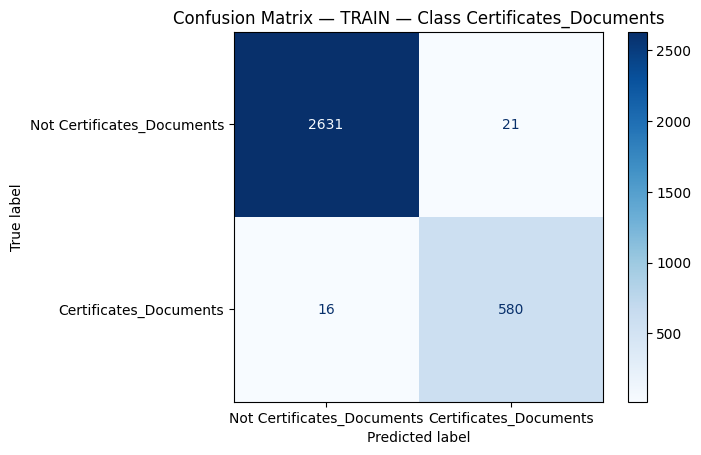

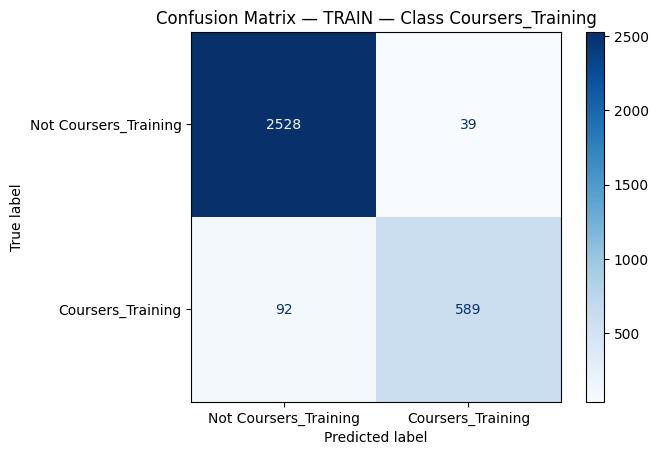

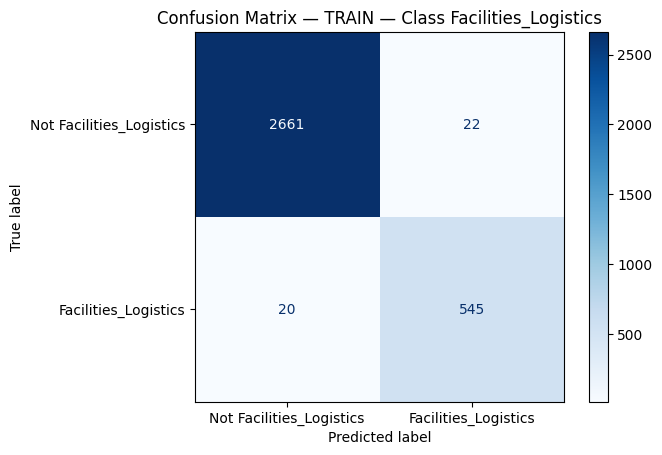

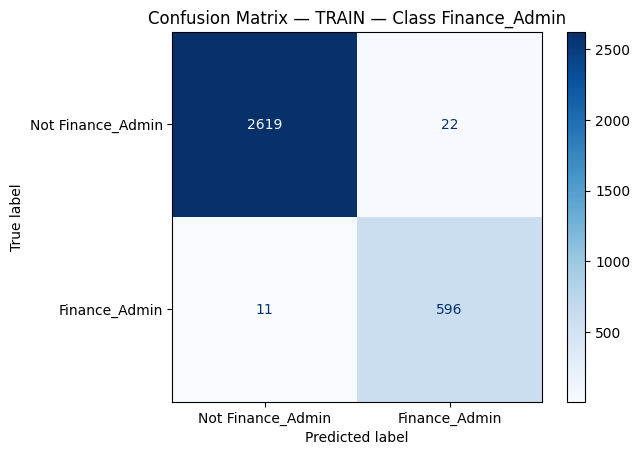

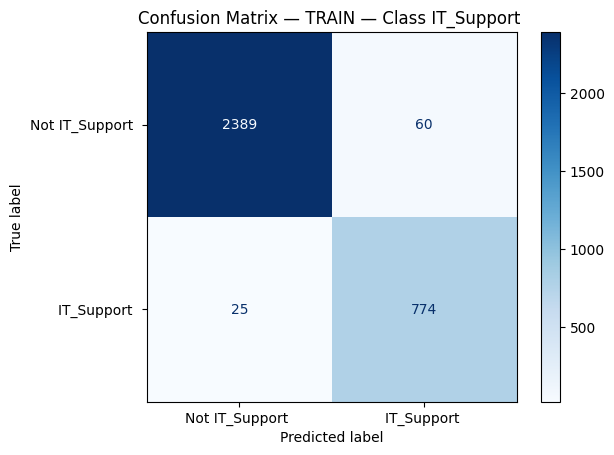

In [24]:
# --- TRAIN ---

# Use the trained model to make predictions on the training dataset
pred_train = trainer.predict(train_dataset)

# Extract the true labels from the prediction output
y_true_train = pred_train.label_ids

# Extract predicted class probabilities/logits and convert them to class IDs
y_pred_train = pred_train.predictions.argmax(axis=1)

# Plot a confusion matrix per class for the training predictions
plot_conf_matrix_per_class(
    y_true_train,       # True labels
    y_pred_train,       # Predicted labels
    class_names,        # List of class names
    split_name="TRAIN"  # Label to show in the plot title
)


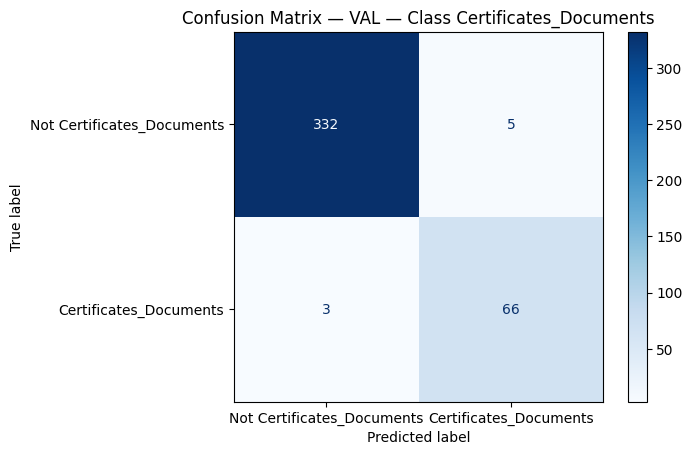

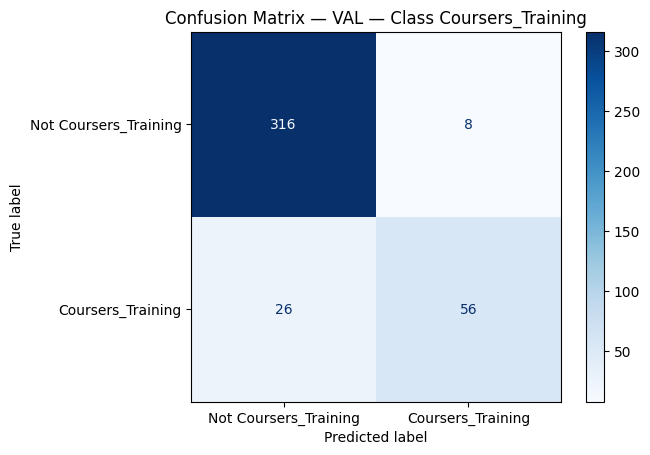

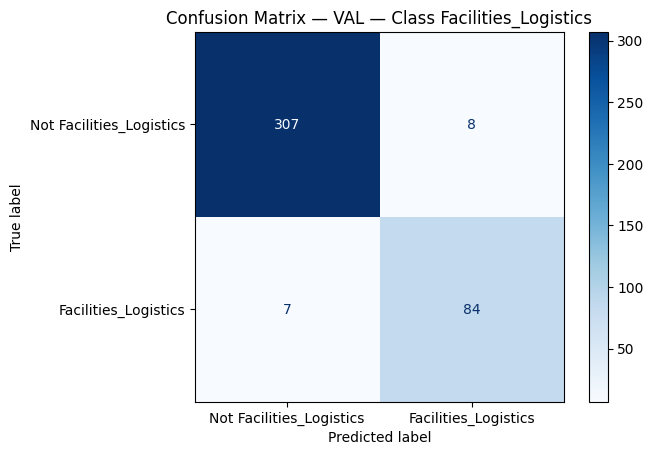

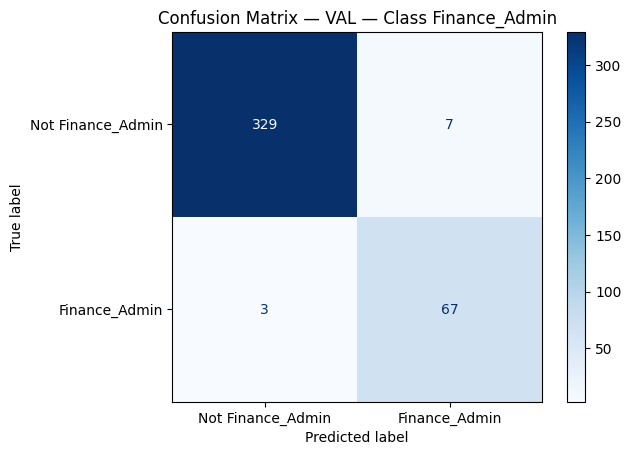

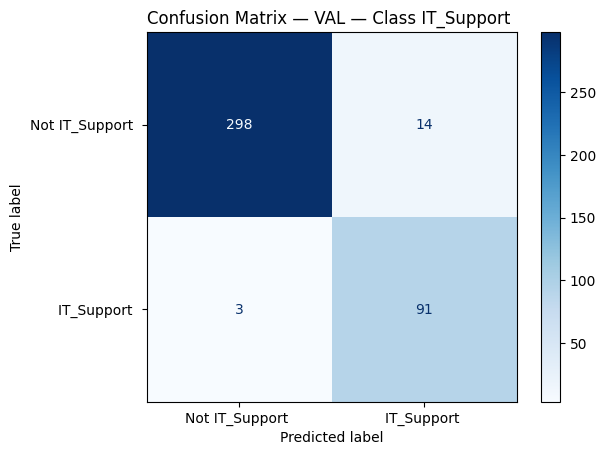

In [25]:
# --- VAL ---

# Use the trained model to make predictions on the validation dataset
pred_val = trainer.predict(val_dataset)

# Extract the true labels from the prediction output
y_true_val = pred_val.label_ids

# Extract predicted class probabilities/logits and convert them to class IDs
y_pred_val = pred_val.predictions.argmax(axis=1)

# Plot a confusion matrix per class for the validation predictions
plot_conf_matrix_per_class(
    y_true_val,       # True labels for validation set
    y_pred_val,       # Predicted labels for validation set
    class_names,      # List of class names
    split_name="VAL"  # Label to show in the plot title
)


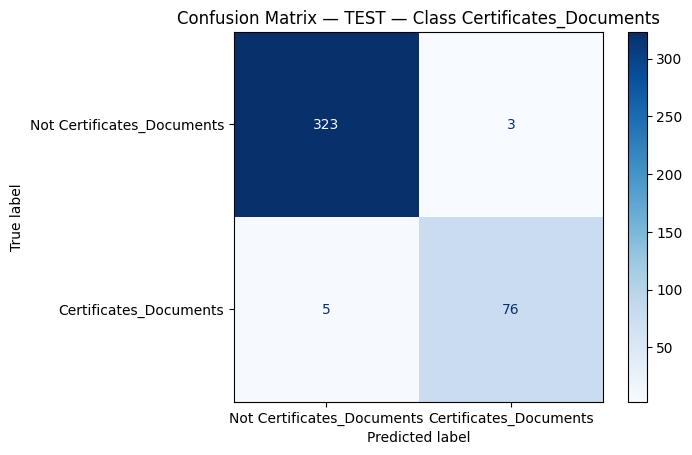

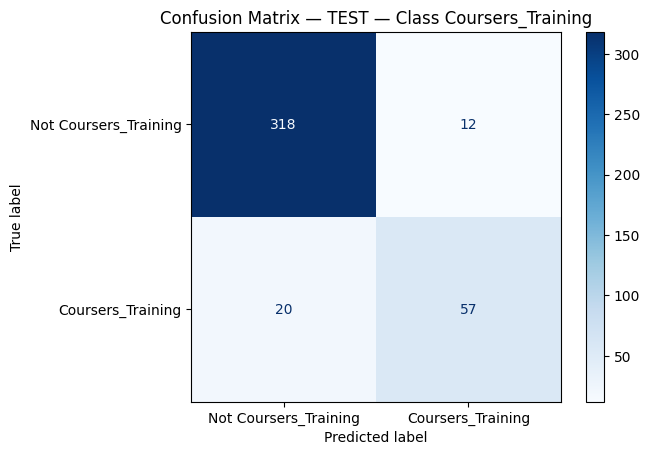

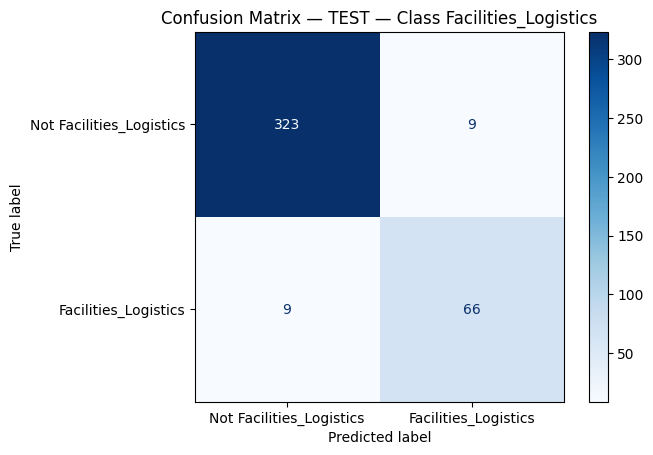

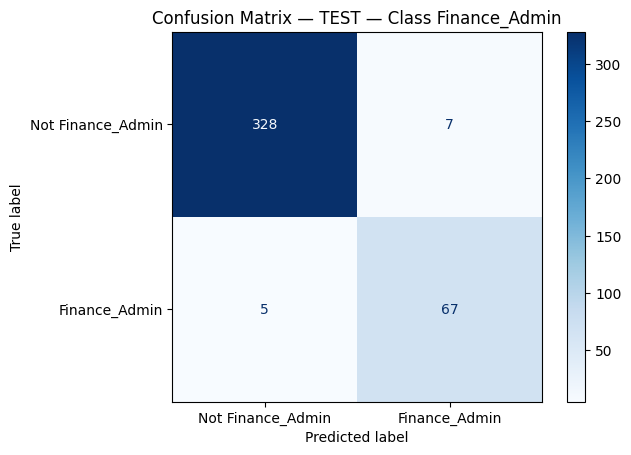

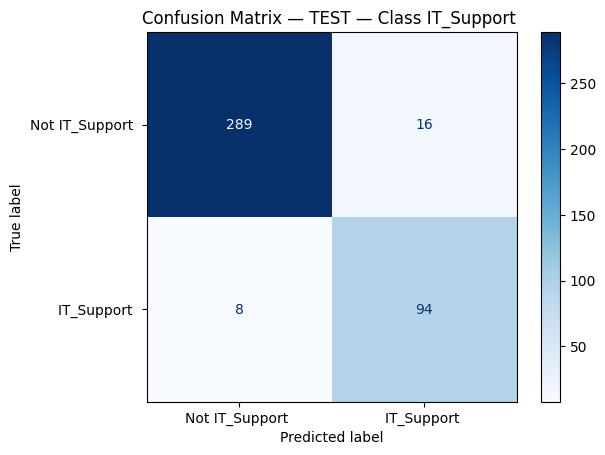

In [26]:
# --- TEST ---

# Use the trained model to make predictions on the test dataset
pred_test = trainer.predict(test_dataset)

# Extract the true labels from the prediction output
y_true_test = pred_test.label_ids

# Extract predicted class probabilities/logits and convert them to class IDs
y_pred_test = pred_test.predictions.argmax(axis=1)

# Plot a confusion matrix per class for the test predictions
plot_conf_matrix_per_class(
    y_true_test,       # True labels for the test set
    y_pred_test,       # Predicted labels for the test set
    class_names,       # List of class names
    split_name="TEST"  # Label shown in the plot title
)


In [27]:
def save_conf_matrix_per_class(y_true, y_pred, class_names, split_name, save_dir):
    """
    Generates and saves one-vs-rest confusion matrices for each class.
    """

    # Create the directory if it does not already exist
    os.makedirs(save_dir, exist_ok=True)

    # Get the list of unique class indices from the true labels
    classes = np.unique(y_true)

    # Loop through each class to construct a binary confusion matrix
    for c in classes:
        # Convert true labels to binary (1 = current class, 0 = all others)
        y_true_bin = (y_true == c).astype(int)

        # Convert predicted labels to binary in the same way
        y_pred_bin = (y_pred == c).astype(int)

        # Compute the confusion matrix for this one-vs-rest setup
        cm = confusion_matrix(y_true_bin, y_pred_bin)

        # Prepare a display object for plotting the confusion matrix
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm,
            display_labels=[f"Not {class_names[c]}", class_names[c]]
        )

        # Plot the confusion matrix using a blue colormap and integer values
        disp.plot(cmap=plt.cm.Blues, values_format='d')

        # Add a title that includes the dataset split and class name
        plt.title(f"Confusion Matrix — {split_name} — Class {class_names[c]}")

        # Build the filename for saving the plot image
        filename = f"{save_dir}/cm_{split_name}_class_{class_names[c]}.png"

        # Save the figure to disk
        plt.savefig(filename)

        # Close the plot to free memory and avoid overlap
        plt.close()


In [28]:
# End the current MLflow run and finalize logging
mlflow.end_run()

🏃 View run incongruous-hen-315 at: https://dagshub.com/doaahazem/classification-model-mlflow.mlflow/#/experiments/0/runs/e5075226137143cd8af4cbb21988a194
🧪 View experiment at: https://dagshub.com/doaahazem/classification-model-mlflow.mlflow/#/experiments/0


In [29]:
# Set (or create) the MLflow experiment where all runs will be recorded
mlflow.set_experiment("bert_classification")

def safe_log_metric(name, value):
    """
    Logs a metric to MLflow only if the value is valid (int/float).
    Prevents MLflow errors when the metric is None or invalid.
    """
    if value is not None and isinstance(value, (int, float)):
        mlflow.log_metric(name, value)
    else:
        print(f"Skipped logging {name} because value={value}")

# Start a new MLflow run
with mlflow.start_run():

    # ===== Log training parameters =====
    mlflow.log_param("model_name", model_name)                        # Name of the model (BERT)
    mlflow.log_param("learning_rate", training_args.learning_rate)   # Training LR
    mlflow.log_param("epochs", training_args.num_train_epochs)        # Number of epochs
    mlflow.log_param("batch_size", training_args.per_device_train_batch_size)  # Batch size

    # ===== Evaluate the model on train/validation/test splits =====
    train_results = trainer.evaluate(train_dataset)   # Metrics for training data
    eval_results = trainer.evaluate(val_dataset)      # Metrics for validation data
    test_results = trainer.evaluate(test_dataset)     # Metrics for test data

    # ===== Log evaluation metrics to MLflow =====
    safe_log_metric("train_accuracy", train_results.get("eval_accuracy"))
    safe_log_metric("train_f1", train_results.get("eval_f1"))
    safe_log_metric("train_loss", train_results.get("eval_loss"))

    safe_log_metric("val_accuracy", eval_results.get("eval_accuracy"))
    safe_log_metric("val_f1", eval_results.get("eval_f1"))
    safe_log_metric("val_loss", eval_results.get("eval_loss"))

    safe_log_metric("test_accuracy", test_results.get("eval_accuracy"))
    safe_log_metric("test_f1", test_results.get("eval_f1"))
    safe_log_metric("test_loss", test_results.get("eval_loss"))

    # ===== Save all evaluation results to a JSON file =====
    all_results = {
        "train": train_results,
        "validation": eval_results,
        "test": test_results
    }

    # Write results to disk
    with open("all_eval_results.json", "w") as f:
        json.dump(all_results, f, indent=4)

    # Log JSON file to MLflow as an artifact
    mlflow.log_artifact("all_eval_results.json", "eval_results")

    # ===== Generate Confusion Matrices =====
    preds_train = trainer.predict(train_dataset)  # Predictions for training set
    preds_val = trainer.predict(val_dataset)      # Predictions for validation set
    preds_test = trainer.predict(test_dataset)    # Predictions for test set

    # Remove old confusion matrix folders if they exist
    import shutil
    shutil.rmtree("conf_mats", ignore_errors=True)

    # Save confusion matrices for each split
    save_conf_matrix_per_class(
        preds_train.label_ids,
        preds_train.predictions.argmax(axis=1),
        class_names,
        "TRAIN",
        "conf_mats/train"
    )

    save_conf_matrix_per_class(
        preds_val.label_ids,
        preds_val.predictions.argmax(axis=1),
        class_names,
        "VALID",
        "conf_mats/val"
    )

    save_conf_matrix_per_class(
        preds_test.label_ids,
        preds_test.predictions.argmax(axis=1),
        class_names,
        "TEST",
        "conf_mats/test"
    )

    # Upload the entire folder of confusion matrix images to MLflow
    mlflow.log_artifacts("conf_mats", "confusion_matrices")


2025/11/30 02:57:23 INFO mlflow.tracking.fluent: Experiment with name 'bert_classification' does not exist. Creating a new experiment.


🏃 View run useful-crane-951 at: https://dagshub.com/doaahazem/classification-model-mlflow.mlflow/#/experiments/1/runs/7bd58af8a9f04001b617376cc2beae4b
🧪 View experiment at: https://dagshub.com/doaahazem/classification-model-mlflow.mlflow/#/experiments/1
